In [5]:
# Test of Algorithm 2.1
'''
How to find Ax = b, A > 0 (Positive definite)
- Find Cholesky A = L L.T
- Solve Lv = b forward substitution
- Solve L.T x = v backward subsitution
'''

from sklearn.datasets import make_spd_matrix, make_sparse_spd_matrix
import numpy as np
import time
np.set_printoptions(precision=12)

A = make_spd_matrix(4)
b = np.random.randn(4)
# b = make_sparse_spd_matrix(4, alpha = .6)

t1 = time.time()
L = np.linalg.cholesky(A)
v = np.linalg.solve(L, b)
x = np.linalg.solve(L.T, v)
t2 = time.time()
print("Time consumed: ", t2 - t1)
print("x: ", x)
print("Ax: ", A @ x)
print("b: ", b)


Time consumed:  0.00023174285888671875
x:  [-1.14635365235  -1.74439306026   3.746804560358  2.903581382143]
Ax:  [-0.514014459458 -0.883325855265  0.738485842649  1.5527516177  ]
b:  [-0.514014459458 -0.883325855265  0.738485842649  1.5527516177  ]


In [6]:
# Algorithm 2.2
'''
How to find AX = B, A > 0 (Positive definite)
- Compute Cholesky, A = L L.T
- for j = 1 to k do:
    - Solve L v = B_j
    - Solve L.T X_j = v
end for
'''
A = make_spd_matrix(4)
B = np.random.rand(4, 3)
X = np.zeros_like(B)

t1 = time.time()
L = np.linalg.cholesky(A)
for i in range(B.shape[1]):
    v = np.linalg.solve(L, B[:, i])
    X[:, i] = np.linalg.solve(L.T, v)
t2 = time.time()
print("Time consumed: ", t2 - t1)
print("X: ", X)
print("AX: ", A @ X)
print("B: ", B)

Time consumed:  0.0004420280456542969
X:  [[ 1.438760086978  2.174486171794  1.721316059385]
 [ 0.816280567891  0.21573706157  -0.101382130285]
 [-0.024616551908  1.090742188771  0.252101328331]
 [ 2.865425902802  0.27653216674   2.216093961867]]
AX:  [[0.636882660385 0.952048932208 0.616897188608]
 [0.965643742243 0.038298963499 0.038496064186]
 [0.056548435768 0.601508835151 0.581407772786]
 [0.921600835909 0.182703761743 0.750432571194]]
B:  [[0.636882660385 0.952048932208 0.616897188608]
 [0.965643742243 0.038298963499 0.038496064186]
 [0.056548435768 0.601508835151 0.581407772786]
 [0.921600835909 0.182703761743 0.750432571194]]


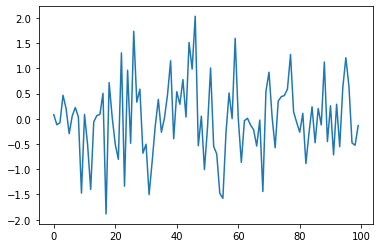

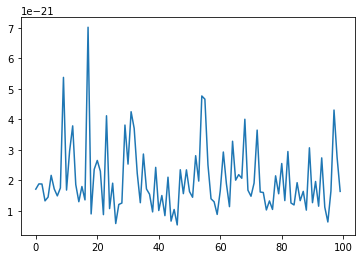

In [7]:
# Algorithm 2.3
'''
Sample from GMRF x ~ N(u, S)
- Compute S = L L.T
- Sample z ~ N(0, I)
- Compute v = L z
- Compute x = u + v
'''

import matplotlib.pyplot as plt
ndim = 100
Cov = make_spd_matrix(ndim)
L = np.linalg.cholesky(Cov)
z = np.random.randn(ndim)
v = L @ z
x = v
plt.plot(x)

'''
Compute log density
log pi(x) = - n / 2 log(2 * pi) - sum(log(L)) - 1 / 2 u.T u
'''
log_density = - ndim / 2 * np.log(2 * np.pi) - np.sum(np.log(np.diag(L))) - 1 / 2 * z
plt.figure()
plt.plot(np.exp(log_density))


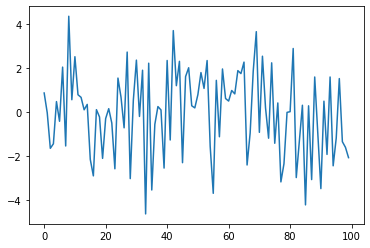

In [10]:
# Algorithm 2.4 sample x ~ N(u, Q^-1)
'''
- Compute cholesky, Q = L L.T
- Sample z ~ N(0, I)
- Solve L.T v = z
- Compute x = u + v
'''
ndim = 100
Q = make_spd_matrix(ndim)
L = np.linalg.cholesky(Q)
z = np.random.randn(ndim)
v = np.linalg.solve(L.T, z)
x = v
plt.plot(x)

